# Credit Risk Scoring Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Download the dataset. Uncomment the line to download data 
# !curl -o "data.csv" "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"

### 1. Data cleaning and preparation

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   status     4455 non-null   int64
 1   seniority  4455 non-null   int64
 2   home       4455 non-null   int64
 3   time       4455 non-null   int64
 4   age        4455 non-null   int64
 5   marital    4455 non-null   int64
 6   records    4455 non-null   int64
 7   job        4455 non-null   int64
 8   expenses   4455 non-null   int64
 9   income     4455 non-null   int64
 10  assets     4455 non-null   int64
 11  debt       4455 non-null   int64
 12  amount     4455 non-null   int64
 13  price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [8]:
# Checking for null values
df.isna().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [9]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [10]:
# Converting some columns into categories
status_values = {
    1: "ok",
    2: "default",
    0: "unk"
}
df.status = df.status.map(status_values)

home_values = {
    1: "rent",
    2: "owner",
    3: "private",
    4: "ignore",
    5: "parents",
    6: "other",
    0: "unk"
}
df.home = df.home.map(home_values)


marital_values = {
    1: "single",
    2: "married",
    3: "widow",
    4: "separated",
    5: "divorced",
    0: "unk"
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: "no",
    2: "yes",
    0: "unk"
}
df.records = df.records.map(records_values)

job_values = {
    1: "fixed",
    2: "partime",
    3: "freelance",
    4: "others",
    0: "unk"
}
df.job = df.job.map(job_values)

In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [13]:
# Values with entry 99999999 mean those values are empty and have been replaced with such huge figues
for column in ['income', 'assets','debt']:
    df[column] = df[column].replace(to_replace =99999999, value=np.nan)

In [14]:
# Remove record with status as unknown
df = df[df.status != 'unk'].sample(frac = 1).reset_index(drop = True)

In [15]:
# Splitting into train, test, and validation sets
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 42)

In [16]:
df_train  = df_train[df_train.marital != "unk"].reset_index(drop = True)
df_val  = df_val.reset_index(drop = True)
df_test  = df_test.reset_index(drop = True)

In [17]:
for status in df_val.marital:
    if status == "unk":
        print(status)

In [18]:
len(df_train) , len(df_test), len(df_val)

(2672, 891, 891)

In [19]:
y_train = (df_train.status == "default").astype(int).values
y_val = (df_val.status == "default").astype(int).values
y_test = (df_test.status == "default").astype(int).values

In [20]:
del df_train['status']
del df_test['status']
del df_val['status']

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seniority  2672 non-null   int64  
 1   home       2672 non-null   object 
 2   time       2672 non-null   int64  
 3   age        2672 non-null   int64  
 4   marital    2672 non-null   object 
 5   records    2672 non-null   object 
 6   job        2672 non-null   object 
 7   expenses   2672 non-null   int64  
 8   income     2654 non-null   float64
 9   assets     2642 non-null   float64
 10  debt       2659 non-null   float64
 11  amount     2672 non-null   int64  
 12  price      2672 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 271.5+ KB


### 6.2 Decision Trees

In [22]:
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "parttime":
            return "ok"
        return "default"
    else:
        if client["assets"] > 6000:
            return "ok"
        return "default"

In [23]:
client  = df_train.iloc[0].to_dict()

In [24]:
assess_risk(client)

'default'

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [26]:
# Convert the dataframe into a dictionary
train_dicts = df_train.fillna(0).to_dict(orient="records")
# Initialize dictionary vectorizer
dv = DictVectorizer(sparse = False)
# Fit and transform the train_dicts
X_train = dv.fit_transform(train_dicts)

In [27]:
# Viewing the transformed train data.
X_train

array([[4.30e+01, 1.35e+03, 0.00e+00, ..., 1.00e+00, 7.00e+00, 4.80e+01],
       [2.90e+01, 6.00e+02, 0.00e+00, ..., 0.00e+00, 1.10e+01, 1.20e+01],
       [3.50e+01, 1.50e+03, 0.00e+00, ..., 0.00e+00, 0.00e+00, 4.80e+01],
       ...,
       [4.40e+01, 1.10e+03, 0.00e+00, ..., 0.00e+00, 1.70e+01, 6.00e+01],
       [2.20e+01, 6.00e+02, 0.00e+00, ..., 0.00e+00, 5.00e+00, 1.80e+01],
       [4.20e+01, 1.35e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01]])

In [28]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [29]:
tree = DecisionTreeClassifier()

In [30]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Converting validation data into dictionaries
val_dicts = df_val.fillna(0).to_dict(orient = "records")
X_val = dv.transform(val_dicts)

In [32]:
y_pred = tree.predict_proba(X_val)[:,1]

In [33]:
y_pred.shape

(891,)

In [34]:
roc_auc_score(y_val, y_pred)

0.6170910109561752

In [35]:
y_pred_train = tree.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

1.0

In [36]:
# Viewing the decision tree
r = export_text(tree, feature_names=list(dv.get_feature_names_out()))
print(r)

|--- seniority <= 2.50
|   |--- records=no <= 0.50
|   |   |--- amount <= 1475.00
|   |   |   |--- debt <= 260.00
|   |   |   |   |--- expenses <= 73.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- assets <= 5250.00
|   |   |   |   |   |   |   |--- amount <= 1425.00
|   |   |   |   |   |   |   |   |--- amount <= 925.00
|   |   |   |   |   |   |   |   |   |--- income <= 122.50
|   |   |   |   |   |   |   |   |   |   |--- amount <= 780.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- amount >  780.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- income >  122.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- amount >  925.00
|   |   |   |   |   |   |   |   |   |--- income <= 238.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |-

### Decision tree parameter tuning
* selecting `max-depth`
* selecting `min-sample-leafs`

In [37]:
# Parameter tuning for the maximum depth and min sample leafs.
scores = []
for depth in np.arange(2,30,2):
    for leaf in np.arange(2,31,2):
        tree_2 = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leaf)
        tree_2.fit(X_train,y_train)

        y_pred = tree_2.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((depth, leaf, auc))
    


In [38]:
# Conver the the scores into a dataframe.
df_scores = pd.DataFrame(scores, columns = ["max_depth", "min_samples_leaf", "auc"])
df_scores

,max_depth,min_samples_leaf,auc
0,2,2,0.720409
1,2,4,0.720409
2,2,6,0.720409
3,2,8,0.720409
4,2,10,0.720409
...,...,...,...
205,28,22,0.770888
206,28,24,0.771990
207,28,26,0.774057
208,28,28,0.787665


In [39]:
df_scores_sorted = df_scores.sort_values("auc", ascending = False).reset_index(drop = True)

In [40]:
df_scores_sorted.head()

,max_depth,min_samples_leaf,auc
0,6,30,0.790700
1,6,28,0.790423
2,6,24,0.789545
3,6,18,0.788997
4,6,26,0.788568


In [41]:
df_scores_pivot = df_scores_sorted.pivot(index = "min_samples_leaf", columns = ["max_depth"], values = ["auc"])

In [42]:
df_scores_pivot.round(3)

auc                                                   \
max_depth           2      4      6      8      10     12     14     16   
min_samples_leaf                                                          
2                 0.72  0.768  0.770  0.734  0.705  0.666  0.660  0.652   
4                 0.72  0.768  0.780  0.731  0.706  0.713  0.718  0.714   
6                 0.72  0.768  0.782  0.746  0.733  0.740  0.731  0.736   
8                 0.72  0.768  0.783  0.749  0.735  0.733  0.734  0.733   
10                0.72  0.768  0.778  0.763  0.740  0.744  0.750  0.746   
12                0.72  0.768  0.780  0.764  0.758  0.762  0.760  0.756   
14                0.72  0.768  0.785  0.773  0.768  0.770  0.768  0.773   
16                0.72  0.768  0.788  0.772  0.764  0.767  0.767  0.769   
18                0.72  0.768  0.789  0.777  0.771  0.774  0.775  0.773   
20                0.72  0.769  0.786  0.781  0.779  0.775  0.780  0.776   
22                0.72  0.769  0.785  0.778  0.775  0.775  0.771  0.776   
24                0.72  0.767  0.790  0.778  0.769  0.775  0.772  0.775   
26                0.72  0.767  0.789  0.776  0.778  0.778  0.774  0.774   
28                0.72  0.767  0.790  0.786  0.785  0.784  0.787  0.786   
30                0.72  0.769  0.791  0.787  0.782  0.779  0.782  0.782   

                                                            
max_depth            18     20     22     24     26     28  
min_samples_leaf                                            
2                 0.659  0.652  0.648  0.654  0.658  0.663  
4                 0.711  0.708  0.701  0.705  0.709  0.700  
6                 0.728  0.742  0.734  0.734  0.731  0.735  
8                 0.733  0.736  0.733  0.736  0.735  0.738  
10                0.749  0.748  0.746  0.747  0.750  0.750  
12                0.755  0.758  0.758  0.760  0.756  0.757  
14                0.769  0.772  0.771  0.771  0.769  0.772  
16                0.767  0.768  0.767  0.767  0.767  0.770  
18                0.772  0.774  0.772  0.774  0.775  0.773  
20                0.779  0.776  0.785  0.785  0.781  0.780  
22                0.772  0.776  0.771  0.771  0.775  0.771  
24                0.776  0.772  0.771  0.772  0.772  0.772  
26                0.777  0.778  0.778  0.777  0.774  0.774  
28                0.784  0.783  0.784  0.785  0.787  0.788  
30                0.782  0.786  0.784  0.779  0.781  0.782

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

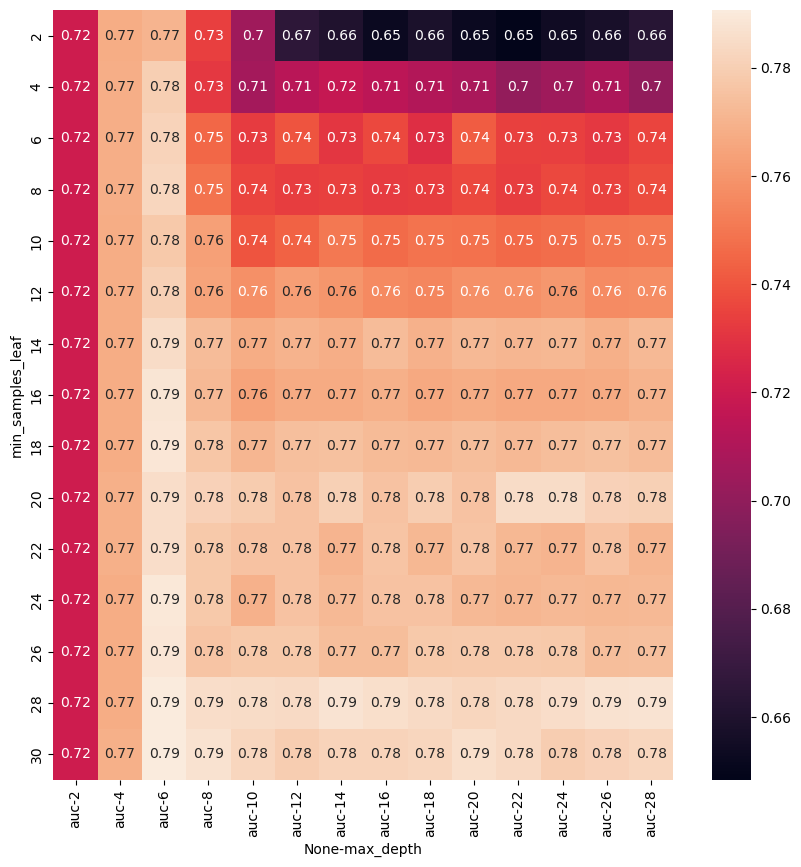

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap(df_scores_pivot, annot = True)

In [44]:
# Selecting a good decision tree after parameter tuning.
best_tree = DecisionTreeClassifier(max_depth = 14, min_samples_leaf = 24)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=24)

### Ensemble Learning and Random Forest

* Random Forest Example

In [45]:
from sklearn.ensemble import RandomForestClassifier


In [46]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 24)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

In [47]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8310445717131475

In [48]:
auc_scores = []
for estimator_number in range(10,201,10):
    forest = RandomForestClassifier(n_estimators = estimator_number,
                                    random_state = 42)
    forest.fit(X_train, y_train)
    
    y_prediction = forest.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_prediction)
    auc_scores.append((estimator_number, auc))

In [49]:
print(auc_scores)

[(10, 0.7966508964143426), (20, 0.8132096613545817), (30, 0.822687375498008), (40, 0.8244802041832668), (50, 0.8263788595617529), (60, 0.8289436005976095), (70, 0.8291677041832669), (80, 0.8307177539840637), (90, 0.8315301294820718), (100, 0.8325417081673308), (110, 0.8352309511952192), (120, 0.8346987051792828), (130, 0.8351936005976095), (140, 0.8355017430278883), (150, 0.8355608814741036), (160, 0.835003735059761), (170, 0.8348667828685259), (180, 0.8353554531872511), (190, 0.8348294322709163), (200, 0.834589765936255)]


In [50]:
forest_df = pd.DataFrame(auc_scores, columns = ["n_estimators", "auc_scores"])

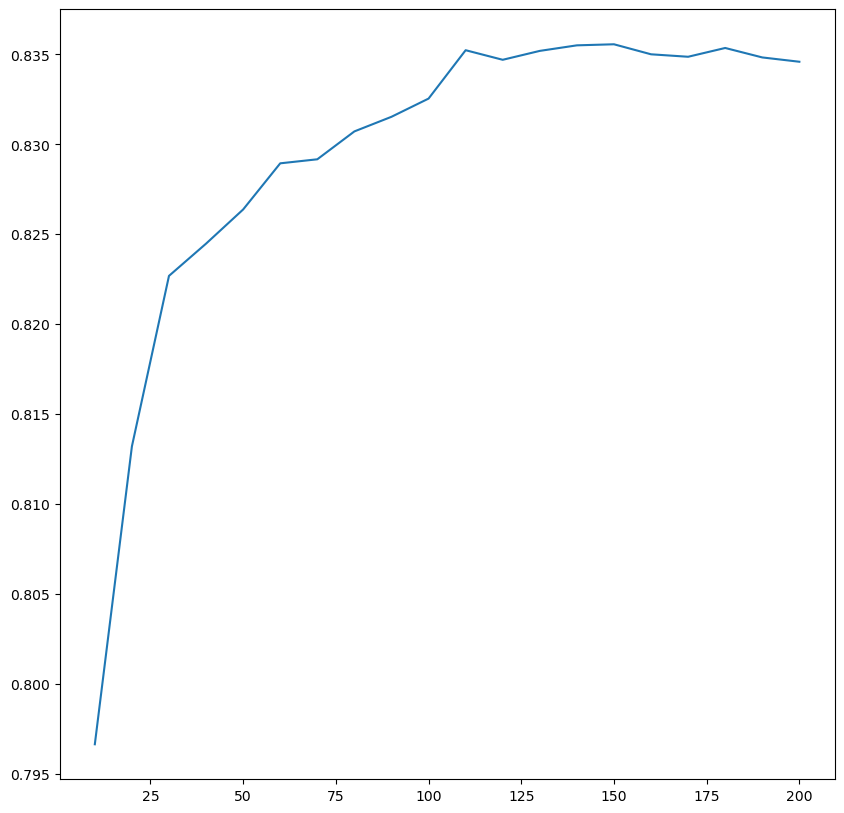

In [51]:
plt.figure(figsize = (10,10))
plt.plot(forest_df.n_estimators, forest_df.auc_scores);

In [52]:
# Tuning the mazx_depth of the RandomForestClassifier
auc_scores = []
for depth in [5,10,15,20]:
    for estimator_number in range(10,201,10):
        forest = RandomForestClassifier(n_estimators = estimator_number,
                                        max_depth = depth,
                                        random_state = 42)
        forest.fit(X_train, y_train)

        y_prediction = forest.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_prediction)
        auc_scores.append((depth, estimator_number, auc))



In [53]:
df_scores = pd.DataFrame(auc_scores, columns = ["max_depth", "estimator_number", "auc"])
df_scores

,max_depth,estimator_number,auc
0,5,10,0.819379
1,5,20,0.819734
2,5,30,0.821722
3,5,40,0.821956
4,5,50,0.825112
...,...,...,...
75,20,160,0.835508
76,20,170,0.834851
77,20,180,0.835738
78,20,190,0.835212


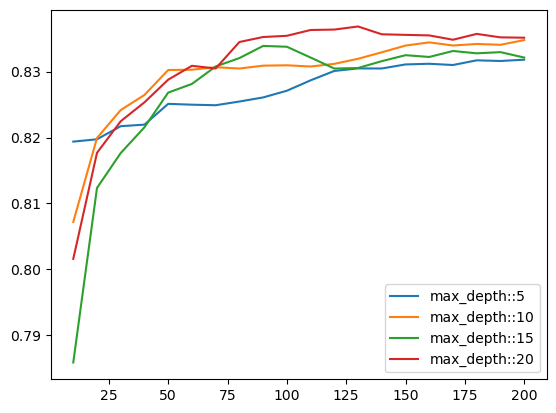

In [54]:
for depth in [5,10,15,20]:
    df_subset = df_scores[df_scores.max_depth == depth]
    plt.plot(df_subset.estimator_number, df_subset.auc, label = f"max_depth::{depth}")
plt.legend()
plt.show()

In [55]:
# Write the code to train with different min_sample_leaf hyperparameters (select the best max_depth to be constant).
scores = []
for min_sample_leaf in [1,3,5,10,50]:
    for n_estimator in range(10,100, 10):
        random_forest = RandomForestClassifier(n_estimators = n_estimator,
                                              max_depth = 10,
                                              min_samples_leaf = min_sample_leaf,
                                              random_state = 42)
        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n_estimator,min_sample_leaf,auc))
    

In [56]:
df_ = pd.DataFrame(scores, columns = ["number_estimators", "min_sample_leaf", "auc_score"])
df_[:10]

,number_estimators,min_sample_leaf,auc_score
0,10,1,0.807171
1,20,1,0.819930
2,30,1,0.824175
3,40,1,0.826463
4,50,1,0.830254
5,60,1,0.830298
6,70,1,0.830677
7,80,1,0.830478
8,90,1,0.830914
9,10,3,0.827235


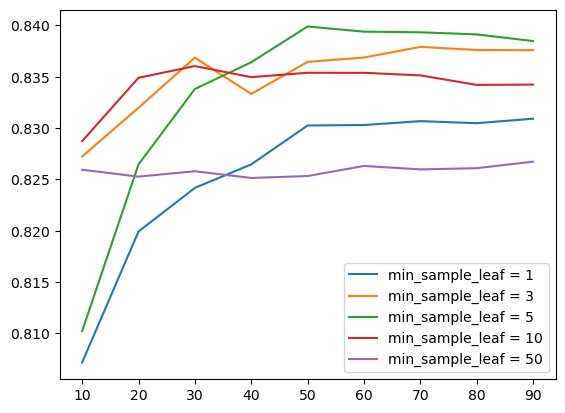

In [57]:
for leaf in [1,3,5,10,50]:
    df_subset = df_[df_.min_sample_leaf == leaf]
    plt.plot(df_subset.number_estimators, df_subset.auc_score, label = f"min_sample_leaf = {leaf}")
    
plt.legend();

### 6.7 Gradient Boosting and XGBoost

* Gradient Boosting v RandomForest

In [58]:
import xgboost as xgb

In [59]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [60]:
# Training a model
xgb_params = {'eta': 0.3,
              'max_depth': 6,
              'min_child_weight': 1,
              'objective':'binary:logistic',
              'nthread': 4,
              'seed': 42,
              'verbosity': 1
             }
model = xgb.train(params = xgb_params,dtrain = dtrain,num_boost_round = 9)

In [61]:
# Using the model to predict validation set and calculating the roc_auc_score
y_pred = model.predict(dval)
xgb_auc = roc_auc_score(y_val, y_pred)
xgb_auc

0.8233192231075697

In [62]:
%%capture output 
# Monitoring the performance of a xgb by evaluating on after each tree is trained 
watchlist = [(dtrain, 'train'), (dval, 'val')]

# Training a model
xgb_params = {'eta': 0.3,
              'max_depth': 6,
              'min_child_weight': 1,
              'objective':'binary:logistic',
              'eval_metric':'auc',
              'nthread': 4,
              'seed': 42,
              'verbosity': 1
             }
model_1 = xgb.train(params = xgb_params,
                    dtrain = dtrain,
                    evals = watchlist,
                    verbose_eval = 5,
                    num_boost_round = 200)

In [63]:
# Custom function to create a data frame from the printed output
def parse_xgb_output(output):
    scores = []

    for line in output.stdout.strip().split('\n'):
        line_split = line.split('\t')
        itr, train_score, val_score = line_split
        
        itr = int(itr.strip('[]'))
        train_score = float(train_score.split(":")[1])
        val_score = float(val_score.split(":")[1])
        scores.append((itr,train_score,val_score))
        
    columns = ["iteration", "train_auc_score", "val_auc_score"]
    return pd.DataFrame(scores, columns = columns)

In [64]:
xgb_df = parse_xgb_output(output).sort_values('train_auc_score').reset_index(drop = True)
xgb_df

,iteration,train_auc_score,val_auc_score
0,0,0.85577,0.79439
1,5,0.92786,0.81842
2,10,0.95131,0.82477
3,15,0.96470,0.83010
4,20,0.97412,0.83141
5,25,0.97906,0.82990
6,30,0.98660,0.82608
7,35,0.98975,0.82814
8,40,0.99383,0.82690
9,45,0.99549,0.82598


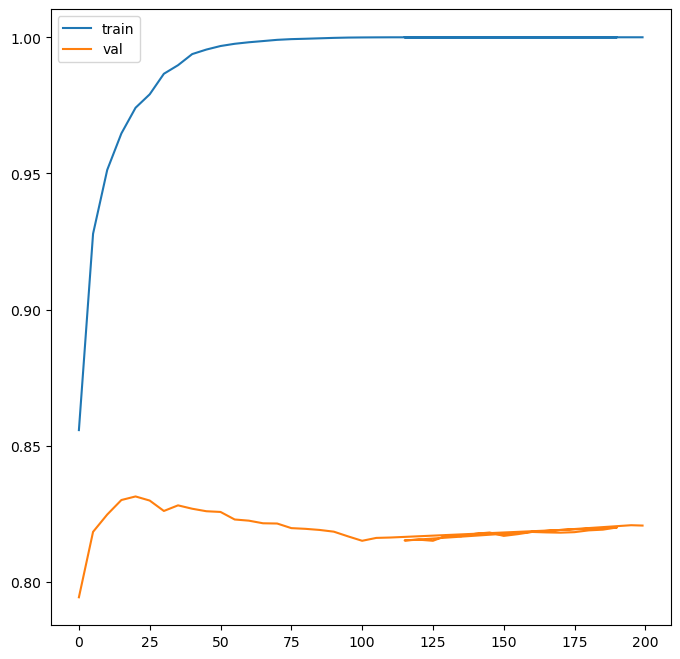

In [65]:
plt.figure(figsize = (8,8))
plt.plot(xgb_df.iteration, xgb_df.train_auc_score, label = "train")
plt.plot(xgb_df.iteration, xgb_df.val_auc_score, label ="val")

plt.legend();

### XGBoost Parameter Tuning

In [66]:
# Final  model after tuning
xgb_param = {'eta': 0.01,
              'max_depth': 3,
              'min_child_weight': 6,

              'objective':'binary:logistic',
              'eval_metric':'auc',

              'nthread': 8,
              'seed': 1,
              'verbosity': 1
             }
model_1 = xgb.train(params = xgb_param,
                    dtrain = dtrain,
                    evals = watchlist,
                    verbose_eval = 5,
                    num_boost_round = 40)

[0]	train-auc:0.77580	val-auc:0.75459
[5]	train-auc:0.77580	val-auc:0.75459
[10]	train-auc:0.78345	val-auc:0.76041
[15]	train-auc:0.78770	val-auc:0.76514
[20]	train-auc:0.79714	val-auc:0.78028
[25]	train-auc:0.80361	val-auc:0.78991
[30]	train-auc:0.80520	val-auc:0.79161
[35]	train-auc:0.80550	val-auc:0.79316
[39]	train-auc:0.80918	val-auc:0.79543


* Experiment with other parameters

### Selecting the final model

In [67]:
df_full_train = df_train_full.reset_index(drop = True)

In [68]:
y_train_full = (df_train_full.status == 'default').astype(int).values
y_train_full

array([1, 0, 0, ..., 0, 1, 0])

In [69]:
del df_full_train["status"]

In [93]:
dicts_full_train = df_full_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_train_full = dv.fit_transform(dicts_full_train)
dicts_test = df_test.to_dict(orient = 'records')
X_test = dv.transform(dicts_test)

In [94]:
dicts_full_train[0]

{'seniority': 1,
 'home': 'parents',
 'time': 60,
 'age': 33,
 'marital': 'married',
 'records': 'yes',
 'job': 'freelance',
 'expenses': 45,
 'income': 0.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1471}

In [72]:
features = dv.get_feature_names_out() 
dfull_train = xgb.DMatrix(X_train_full, label = y_train_full, feature_names= dv.feature_names_)
dtest = xgb.DMatrix(X_test, feature_names = features)

In [73]:
# Training on full train data
xgb_param = {'eta': 0.3,
              'max_depth': 3,
              'min_child_weight': 1,

              'objective':'binary:logistic',
              'eval_metric':'auc',

              'nthread': 4,
              'seed': 1,
              'verbosity': 1
             }
final_model = xgb.train(xgb_param,
                    dfull_train,
                    num_boost_round = 175)

In [74]:
y_pred = final_model.predict(dtest) 

In [75]:
roc_auc_score(y_test,y_pred)

0.8126922331742995

### Saving the model using bentoml

In [79]:
import bentoml
bentoml.xgboost.save_model("credit_risk_pred_model",final_model,
                          custom_objects = {
                              "DictVectorizer":dv
                          })

Model(tag="credit_risk_pred_model:x4cbkyzkjsj3tzfz", path="C:\Users\Isaac\bentoml\models\credit_risk_pred_model\x4cbkyzkjsj3tzfz\")

In [83]:
sample = dicts_full_train[0]
transformed = dv.transform(sample)
prediction = final_model.predict(transformed)
prediction

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'numpy.ndarray'>)

In [84]:
features

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [88]:
df_full_train.columns

Index(['seniority', 'home', 'time', 'age', 'marital', 'records', 'job',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')